<a href="https://colab.research.google.com/github/catmalark/Tensorflow-Study-Notes/blob/main/CatsvsDogsConvNNipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import random
from shutil import copyfile

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip \
    -O "/tmp/cats-and-dogs.zip"

--2022-04-21 07:22:49--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.220.136.113, 2600:1402:6800:297::e59, 2600:1402:6800:283::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.220.136.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   118MB/s    in 7.1s    

2022-04-21 07:22:56 (111 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
import zipfile

# Unzip the dataset
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
import os

# Directory with our training cat pictures
train_cats_dir = os.path.join('/tmp/PetImages/Cat')

# Directory with our training dog pictures
train_dogs_dir = os.path.join('/tmp/PetImages/Dog')

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training cat images: 12501
total training dog images: 12501


In [5]:
#Deleting corrupted files or we can use the code three blocks below

import PIL
from pathlib import Path                  
from PIL import UnidentifiedImageError    

path = Path("/content/cats-and-dogs/PetImages/Cat").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [6]:
# !rm /tmp/cats-and-dogs/PetImages/Dog/11702.jpg
# !rm /tmp/cats-and-dogs/PetImages/Cat/666.jpg

In [7]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)


def create_train_test_dirs(root_path):
  os.makedirs(root_path)
  subdir = os.path.join(root_path, "training/dogs") 
  os.makedirs(subdir)

  subdir = os.path.join(root_path, "training/cats") 
  os.makedirs(subdir)
  
  subdir = os.path.join(root_path, "testing/dogs") 
  os.makedirs(subdir)

  subdir = os.path.join(root_path, "testing/cats") 
  os.makedirs(subdir)
  pass
   
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [8]:
# Now spliting data into train and validation 

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  source = os.listdir(SOURCE)
  source = random.sample(source, len(source))

  training_size = int(SPLIT_SIZE * (len(source)))
  
  for i in source[0:training_size]:
    im_path = os.path.join(SOURCE, "{0}".format(i))
    if os.path.getsize(im_path) == 0:
      print("{0} is zero length, so ignoring".format(i))
    else:
      copyfile(im_path, TRAINING + i)
  for j in source[training_size:len(source)]:
    im_path = os.path.join(SOURCE, "{0}".format(j))
    if os.path.getsize(im_path) == 0:
      print("{0} is zero length, so ignoring".format(j))
    else:
      copyfile(im_path, TESTING + j) 
  pass

In [9]:
# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

# Define proportion of images used for training
split_size = .9

# Run the function
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1251 images of cats for testing
There are 1251 images of dogs for testing


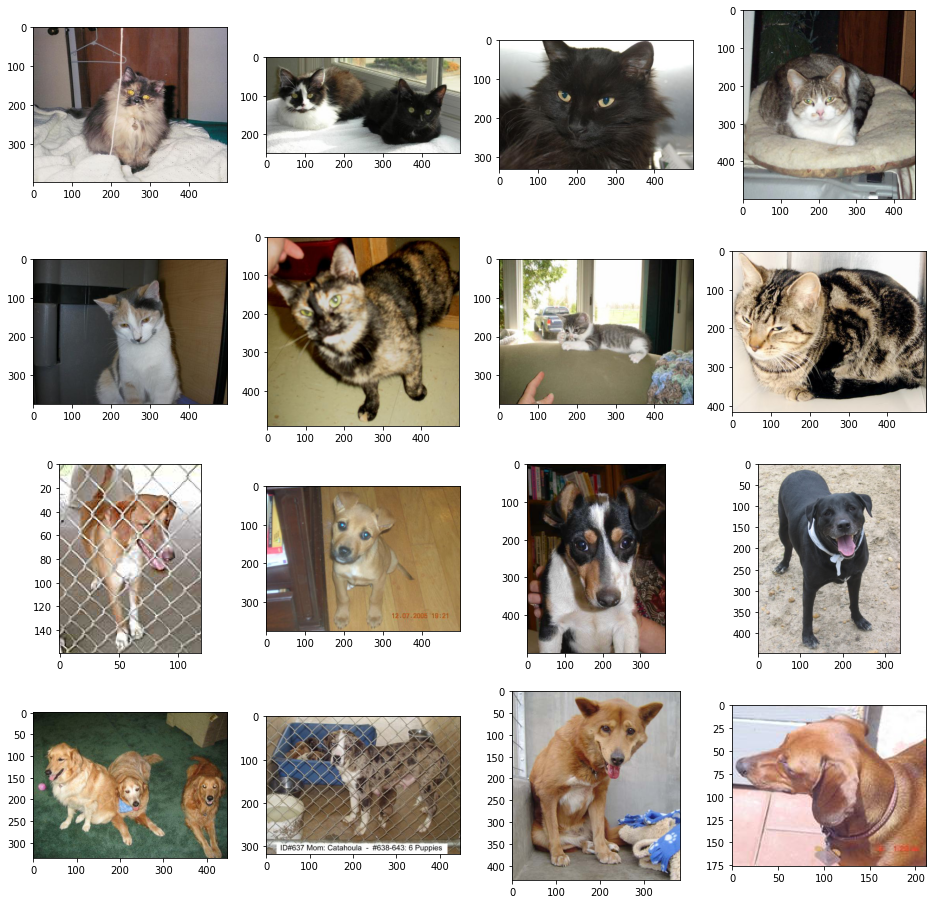

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in os.listdir(train_cats_dir)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in os.listdir(train_dogs_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [11]:
#Pre Proccesing
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode="binary",
                                                      target_size=(150, 150))


validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(directory=TESTING_DIR,
                                                                batch_size=64,
                                                                class_mode="binary",
                                                                target_size=(150, 150))

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [12]:
model = keras.models.Sequential([
                                 layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)),
                                 layers.MaxPooling2D(2,2),
                                 #Second convolution
                                 layers.Conv2D(64, (3,3), activation="relu"),
                                 layers.MaxPooling2D(2,2),
                                 #Third convolution
                                 layers.Conv2D(128, (3,3), activation="relu"),
                                 layers.MaxPooling2D(2,2),
                                 
                                 layers.Flatten(),
                                 layers.Dense(512, activation="relu"),
                                 layers.Dense(128, activation="relu"),
                                 layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001),
                loss="binary_crossentropy",
                metrics=['accuracy']) 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
#Callback Function
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') >= 0.96: 
                print("\nReached 96% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True

In [15]:
callbacks = myCallback()

history = model.fit(
      train_generator,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,    
      callbacks=[callbacks]
      )

Epoch 1/15
149/352 [===========>..................] - ETA: 1:36 - loss: 0.7280 - accuracy: 0.5371

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

352/352 [==============================] - 188s 498ms/step - loss: 0.7062 - accuracy: 0.5557 - val_loss: 0.6751 - val_accuracy: 0.5775
Epoch 2/15
352/352 [==============================] - 173s 492ms/step - loss: 0.6627 - accuracy: 0.6014 - val_loss: 0.6080 - val_accuracy: 0.6823
Epoch 3/15
352/352 [==============================] - 176s 499ms/step - loss: 0.5935 - accuracy: 0.6840 - val_loss: 0.5256 - val_accuracy: 0.7426
Epoch 4/15
352/352 [==============================] - 174s 494ms/step - loss: 0.5440 - accuracy: 0.7232 - val_loss: 0.5742 - val_accuracy: 0.7122
Epoch 5/15
352/352 [==============================] - 171s 485ms/step - loss: 0.5064 - accuracy: 0.7496 - val_loss: 0.4421 - val_accuracy: 0.7930
Epoch 6/15
352/352 [==============================] - 171s 487ms/step - loss: 0.4804 - accuracy: 0.7708 - val_loss: 0.4363 - val_accuracy: 0.8034
Epoch 7/15
352/352 [==============================] - 172s 489ms/step - loss: 0.4499 - accuracy: 0.7866 - val_loss: 0.4037 - val_accura

In [21]:
#Creating image upload folder
os.makedirs("/tmp/images")

In [22]:
#Now upload and predict your image
from keras.preprocessing import image
import os

images = os.listdir("/tmp/images")

print(images)

for i in images:
  print()
  # predicting images
  path = '/tmp/images/' + i
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(i + " is a dog")
  else:
    print(i + " is a cat")
 

['PHOTO-2022-04-10-18-03-16.jpg', 'IMG_1155.jpeg', 'IMG_1978.jpg', 'IMG_1156.jpeg']

[0.84282655]
PHOTO-2022-04-10-18-03-16.jpg is a dog

[0.94055766]
IMG_1155.jpeg is a dog

[0.99111265]
IMG_1978.jpg is a dog

[0.99788386]
IMG_1156.jpeg is a dog
